<a href="https://colab.research.google.com/github/PiHau/ISH_ressources_cours_ML/blob/main/Rendu1/MachineLearning_Poverty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Partie 1 : Pré-traitement et visualisation

## 1.1 Charger le jeu de données et afficher un aperçu du tableau

In [ ]:
# Importations des bibliothèques utilisées dans le notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.decomposition import PCA
from matplotlib.colors import Normalize
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, adjusted_mutual_info_score, homogeneity_score, completeness_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import calinski_harabasz_score
from sklearn.cluster import KMeans
from sklearn.svm import SVC

# Enregistrer le début d'execution pour vérifier que la durée d'exécution < 20min
start_time = time.time()

In [ ]:
# Charger le dataset
data = pd.read_csv("population.csv")

# Afficher les premières lignes du dataset
data.head()

,revenu_median,valeur_maison_mediane,population_inactive,population_totale_scolarisee,population_totale_pauvre,loyer_median,population_assuree,age_median,population_totale,population_travail,foyers_internet,logements_totaux,veterans,population_handicapee,etat,comte,annee,County,State
0,44874,167500,6822,135016.0,192943.0,809,193472,40.9,195540.0,NaN,70259,105786.0,151050,193472,1,3,2013,Baldwin,Alabama
1,36205,92900,8269,78365.0,113722.0,589,115139,37.6,116736.0,NaN,43851,53060.0,90288,115139,1,15,2013,Calhoun,Alabama
2,39936,117400,2460,55588.0,79720.0,619,80078,40.3,NaN,NaN,32225,36882.0,62751,80078,1,43,2013,Cullman,Alabama
3,40876,106800,2167,47327.0,70124.0,530,70341,38.8,71013.0,NaN,22754,30853.0,54626,70341,1,49,2013,DeKalb,Alabama
4,50699,142000,3450,54846.0,75017.0,805,74996,38.5,80902.0,NaN,28292,32937.0,62055,74996,1,51,2013,Elmore,Alabama


# Présentation des données
## Données démographiques de l’ACS (2013-2019)

Les données démographiques de l’American Community Survey (ACS) couvrent une période de **2013 à 2019** et regroupent divers indicateurs économiques et sociaux par comté.

| **Variable**                | **Description**                                    | **Type**  |
|-----------------------------|--------------------------------------------------|----------|
| `revenu_median`             | Revenu médian des ménages                        | Numérique |
| `valeur_maison_mediane`     | Valeur médiane des maisons                       | Numérique |
| `population_inactive`       | Population inactive                              | Numérique |
| `population_totale_scolarisee` | Population scolarisée                            | Numérique |
| `population_totale_pauvre`  | Population sous le seuil de pauvreté             | Numérique |
| `loyer_median`              | Loyer médian                                    | Numérique |
| `population_assuree`        | Nombre de personnes assurées                    | Numérique |
| `age_median`                | Âge médian                                      | Numérique |
| `population_totale`         | Population totale                               | Numérique |
| `population_travail`        | Population active                               | Numérique |
| `foyers_internet`           | Foyers avec Internet                            | Numérique |
| `logements_totaux`          | Logements totaux                                | Numérique |
| `veterans`                  | Nombre de vétérans                              | Numérique |
| `population_handicapee`     | Personnes handicapées                           | Numérique |
| `etat`                      | État du comté                                   | Catégorielle |
| `comte`                     | Nom du comté                                    | Catégorielle |
| `annee`                     | Année de collecte                               | Numérique|
---

## Nombre d’individus et variables

- **Nombre d’individus (`n`)** : Plus de 3 000 comtés.
- **Nombre de variables (`p`)** : 15 variables au total, dont :
  - 13 variables numériques.
  - 2 variables catégorielles.

Certaines variables ne sont pas pertinentes dans le cadre de ce travail et seront triées, ou transformées dans les prochaines étapes.

## Source

Les données ACS sont disponibles via l’**US Census Bureau** : [https://www.census.gov/programs-surveys/acs](https://www.census.gov/programs-surveys/acs).

## 1.2 Sélection de la variable à prédire

Nous avons choisi **population_totale_pauvre** comme variable à prédire. C'est une variable numérique que nous allons transformer en variable catégorielle, en créant un indicateur de pauvreté (1 à 4). La pauvreté est une tématique importante dans les études démographiques (géographie), et est souvent corrélées à divers facteustructurels de la population, donc selon nous prédictible.

## 1.3 Traitement des valeurs manquantes

In [ ]:
# Affichage des valeurs manquantes
print(data.isna().sum())

# Remplir les valeurs numériques manquantes par la moyenne (il n'y en a pas beaucoup dans la variable a prédire, donc ce n'est pas trop grave)
for col in data.select_dtypes(include=['float64', 'int64']).columns:
    data[col].fillna(data[col].mean(), inplace=True)

# Remplir les valeurs catégorielles manquantes par la catégorie la plus fréquente
for col in data.select_dtypes(include=['object']).columns:
    data[col].fillna(data[col].mode()[0], inplace=True)


revenu_median                      0
valeur_maison_mediane              0
population_inactive                0
population_totale_scolarisee      29
population_totale_pauvre           1
loyer_median                       0
population_assuree                 0
age_median                         0
population_totale                311
population_travail              2786
foyers_internet                    0
logements_totaux                  52
veterans                           0
population_handicapee              0
etat                               0
comte                              0
annee                              0
County                             0
State                              0
dtype: int64


/var/folders/gx/brwrczjx3pqdb7kq4vgqdqr80000gn/T/ipykernel_46212/4132004356.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)
/var/folders/gx/brwrczjx3pqdb7kq4vgqdqr80000gn/T/ipykernel_46212/4132004356.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alw

## 1.4 Élimination des variables non pertinentes et transformation des catégorielles

Nous déterminons ici les colonnes qui sont inutiles pour prédire le revenu médian (comme Etat, Comte, annee, County, State) et appliquons le "one-hot encoding" aux variables catégorielles restantes.

In [ ]:
# Supprimer les colonnes non pertinentes
data = data.drop(columns=["etat", "comte", "annee", "County", "State", "logements_totaux"])

# Transformer les variables catégorielles en one-hot
data = pd.get_dummies(data, drop_first=True)


Nous rapportons également les valeurs liées à la population a des taux, pour éviter les biais liés à la taille de la popultion.

In [ ]:
# Identification des colonnes relatives à la population, sauf bien sûr population_totale et population_totale_pauvre
population_columns = [
    'population_inactive', 'population_totale_scolarisee', 'population_totale_pauvre',
    'population_assuree', 'population_travail',
    'veterans', 'population_handicapee'
]

# Créer de nouvelles colonnes avec les taux
for col in population_columns:
    data[f"{col}_taux"] = data[col] / data['population_totale']

# Supprimer les colonnes originales de nombres bruts de population
data = data.drop(columns=population_columns)

# Vérifier que les colonnes de taux et d'interaction ont bien été ajoutées et les colonnes brutes supprimées
data.head()


,revenu_median,valeur_maison_mediane,loyer_median,age_median,population_totale,foyers_internet,population_inactive_taux,population_totale_scolarisee_taux,population_totale_pauvre_taux,population_assuree_taux,population_travail_taux,veterans_taux,population_handicapee_taux
0,44874,167500,809,40.9,195540.000000,70259,0.034888,0.690478,0.986719,0.989424,1.299280,0.772476,0.989424
1,36205,92900,589,37.6,116736.000000,43851,0.070835,0.671301,0.974181,0.986320,2.176375,0.773438,0.986320
2,39936,117400,619,40.3,344420.109219,32225,0.007142,0.161396,0.231462,0.232501,0.737649,0.182193,0.232501
3,40876,106800,530,38.8,71013.000000,22754,0.030516,0.666455,0.987481,0.990537,3.577673,0.769239,0.990537
4,50699,142000,805,38.5,80902.000000,28292,0.042644,0.677931,0.927258,0.926998,3.140358,0.767039,0.926998


Définition des catégories par clustering, en prenant soin d'enlever les valeurs non représentatives. *le clustering tient compte de la distribution des données*.

In [ ]:
from sklearn.cluster import KMeans

# Calcul des bornes pour les outliers avec la méthode IQR
Q1 = data['population_totale_pauvre_taux'].quantile(0.25)  # 1er quartile
Q3 = data['population_totale_pauvre_taux'].quantile(0.75)  # 3e quartile
IQR = Q3 - Q1  # Intervalle interquartile

# Définir les bornes pour détecter les outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrer les données pour exclure les outliers
data = data[(data['population_totale_pauvre_taux'] >= lower_bound) &
            (data['population_totale_pauvre_taux'] <= upper_bound)]

# Appliquer le clustering k-means avec 4 clusters sur les données filtrées
kmeans = KMeans(n_clusters=4, random_state=42)
data['categorie_pauvrete'] = kmeans.fit_predict(data[['population_totale_pauvre_taux']])

# Supprimer la colonne utilisée pour le clustering
data = data.drop(columns=['population_totale_pauvre_taux'])

# Vérifier que la colonne catégorie_pauvrete a bien été ajoutée et que population_totale_pauvre_taux a été supprimée
data.head()


,revenu_median,valeur_maison_mediane,loyer_median,age_median,population_totale,foyers_internet,population_inactive_taux,population_totale_scolarisee_taux,population_assuree_taux,population_travail_taux,veterans_taux,population_handicapee_taux,categorie_pauvrete
0,44874,167500,809,40.9,195540.0,70259,0.034888,0.690478,0.989424,1.299280,0.772476,0.989424,1
1,36205,92900,589,37.6,116736.0,43851,0.070835,0.671301,0.986320,2.176375,0.773438,0.986320,3
3,40876,106800,530,38.8,71013.0,22754,0.030516,0.666455,0.990537,3.577673,0.769239,0.990537,1
4,50699,142000,805,38.5,80902.0,28292,0.042644,0.677931,0.926998,3.140358,0.767039,0.926998,2
5,39459,101900,601,40.5,103931.0,40135,0.043625,0.690343,0.992505,2.444519,0.779017,0.992505,1


In [ ]:
# Controler qu'il n'y ait pas de redondance et constater que les corrélation sonnt très faibles :/
correlations = data.corr()
print(correlations['categorie_pauvrete'].sort_values(ascending=False))

categorie_pauvrete                   1.000000
foyers_internet                      0.024999
population_inactive_taux             0.020629
age_median                           0.018923
population_totale_scolarisee_taux    0.016374
population_totale                    0.015241
valeur_maison_mediane               -0.015279
veterans_taux                       -0.017384
revenu_median                       -0.034733
loyer_median                        -0.042096
population_travail_taux             -0.057189
population_assuree_taux             -0.066382
population_handicapee_taux          -0.066382
Name: categorie_pauvrete, dtype: float64


## 1.5 Standardisation des variables d’entrée

Nous allons standardiser les variables d’entrée pour que les modèles puissent mieux converger.

In [ ]:
# Identification des colonnes numériques
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Initialisation du scaler
scaler = StandardScaler()

# Appliquer la normalisation uniquement aux colonnes numériques
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Vérifier le résultat
data.head()


,revenu_median,valeur_maison_mediane,loyer_median,age_median,population_totale,foyers_internet,population_inactive_taux,population_totale_scolarisee_taux,population_assuree_taux,population_travail_taux,veterans_taux,population_handicapee_taux,categorie_pauvrete
0,-0.854187,-0.366953,-0.491384,0.461374,-0.262418,-0.285249,0.449934,0.059824,0.366390,-0.067545,0.104218,0.366390,1
1,-1.378717,-0.968817,-1.338432,-0.273202,-0.392513,-0.411163,3.540747,-0.082791,0.166643,0.699300,0.133226,0.166643,3
3,-1.096092,-0.856674,-1.565595,-0.006083,-0.467996,-0.511753,0.073979,-0.118828,0.437986,1.924456,0.006544,0.437986,1
4,-0.501736,-0.572684,-0.506785,-0.072863,-0.451670,-0.485348,1.116829,-0.033482,-3.650052,1.542112,-0.059853,-3.650052,2
5,-1.181829,-0.896206,-1.292230,0.372335,-0.413652,-0.428880,1.201170,0.058820,0.564586,0.933738,0.301591,0.564586,1


## 1.6 Visualisation par PCA et t-SNE

Pour cette étape, nous utilisons la PCA (Analyse en Composantes Principales) pour réduire la dimensionnalité, puis t-SNE pour visualiser des clusters potentiels.

Variance expliquée par chaque composante principale : [0.28704046 0.18186258 0.15819375 0.11809166]


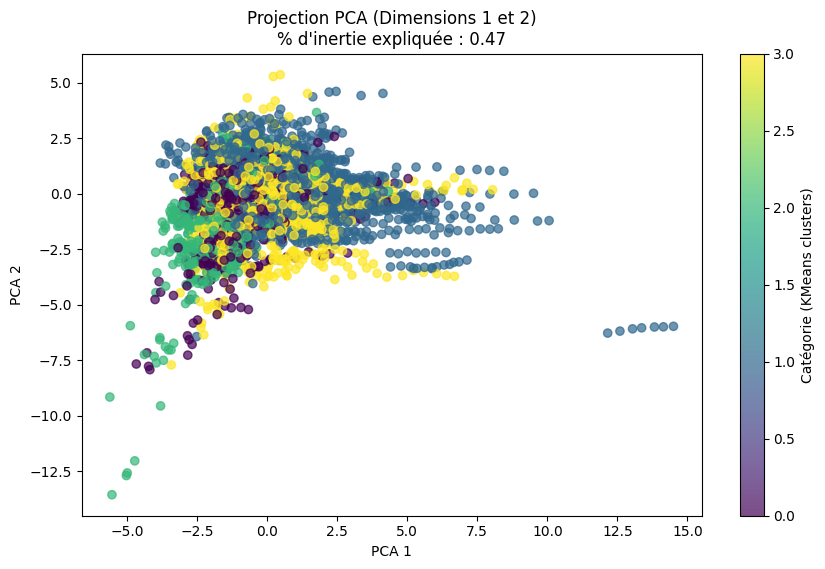

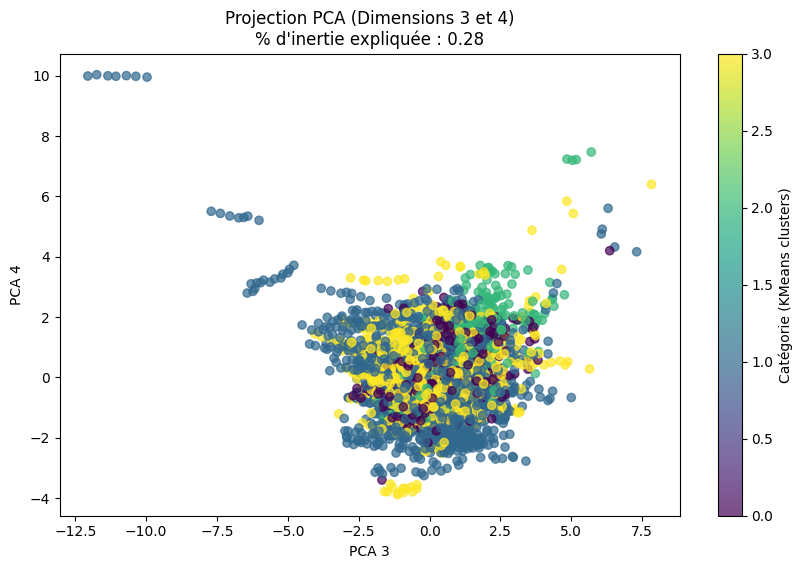

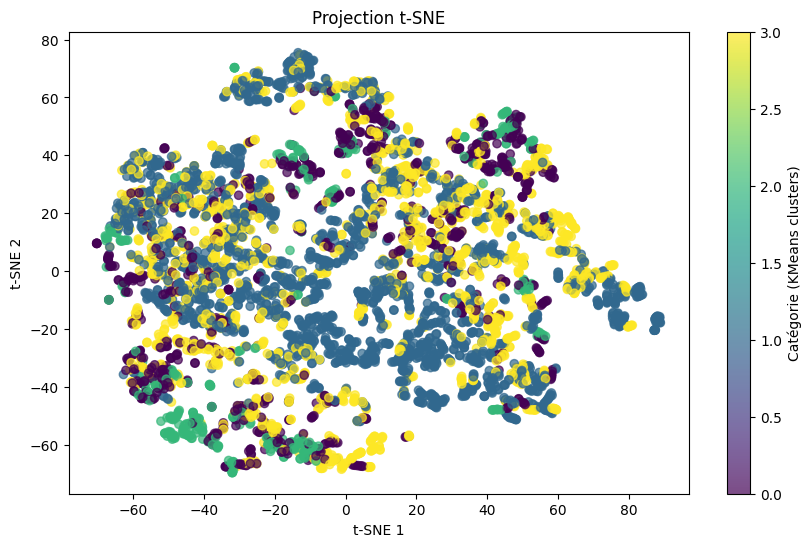

In [ ]:
# Définir les features comme les colonnes numériques (normalisées)
features = data[numeric_columns]

# Définir la cible comme la colonne des catégories de pauvreté
target = data['categorie_pauvrete']

# PCA pour 4 composantes
pca = PCA(n_components=4)
pca_result = pca.fit_transform(features)

# Afficher la variance expliquée par chaque composante
explained_variance_ratio = pca.explained_variance_ratio_
print("Variance expliquée par chaque composante principale :", explained_variance_ratio)

# Normaliser les catégories pour la colorbar
norm = Normalize(vmin=target.min(), vmax=target.max())
colormap = plt.cm.viridis

# Visualisation PCA pour les dimensions 1 et 2
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    pca_result[:, 0], pca_result[:, 1],
    c=target, cmap=colormap, alpha=0.7, norm=norm
)
plt.colorbar(scatter, label="Catégorie (KMeans clusters)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title(f"Projection PCA (Dimensions 1 et 2)\n% d'inertie expliquée : {explained_variance_ratio[0] + explained_variance_ratio[1]:.2f}")
plt.show()

# Visualisation PCA pour les dimensions 3 et 4
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    pca_result[:, 2], pca_result[:, 3],
    c=target, cmap=colormap, alpha=0.7, norm=norm
)
plt.colorbar(scatter, label="Catégorie (KMeans clusters)")
plt.xlabel("PCA 3")
plt.ylabel("PCA 4")
plt.title(f"Projection PCA (Dimensions 3 et 4)\n% d'inertie expliquée : {explained_variance_ratio[2] + explained_variance_ratio[3]:.2f}")
plt.show()

# Appliquer t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(features)

# Visualisation t-SNE
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    tsne_result[:, 0], tsne_result[:, 1],
    c=target, cmap=colormap, alpha=0.7, norm=norm
)
plt.colorbar(scatter, label="Catégorie (KMeans clusters)")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.title("Projection t-SNE")
plt.show()


 Les deux premières dimensions de l'ACP expliquent 47% de la variance, mais les clusters restent peu séparés, ce qui suggère une faible linéarité des relations. Les dimensions 3 et 4, avec 28% de variance expliquée, confirment une dispersion significative des données. Le t-SNE montre une meilleure séparation des clusters, bien que les groupes restent partiellement mélangés et se chevauchent. Ces résultats suggèrent une structure non linéaire des données. Les classes sont difficiles à prédire.

# Étape 2 : Classification

##2.1 Séparation du jeu de données en jeux d’entrainement et de test

Nous allons séparer notre dataset en jeux d’entraînement (80%) et de test (20%).

In [ ]:
# Séparer les données en features (entrées) et variable cible
X = data.drop(columns=['categorie_pauvrete'])  # Variables d'entrée (features)
y = data['categorie_pauvrete']  # Variable cible (catégorie de pauvreté)

# Diviser le dataset en jeu d’entraînement et de test (80% entraînement, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vérifier la taille des jeux de données
print("Taille du jeu d'entraînement :", X_train.shape)
print("Taille du jeu de test :", X_test.shape)


Taille du jeu d'entraînement : (4236, 12)
Taille du jeu de test : (1059, 12)


## 2.2 Baseline avec régression logistique multinomiale

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Jeu d'entraînement
Exactitude : 0.6999527856468366
Précision : 0.694522681947069
Rappel : 0.6999527856468366
F1 Score : 0.6950016376126856

Jeu de test
Exactitude : 0.6940509915014165
Précision : 0.6866330027482405
Rappel : 0.6940509915014165
F1 Score : 0.6884282580174386


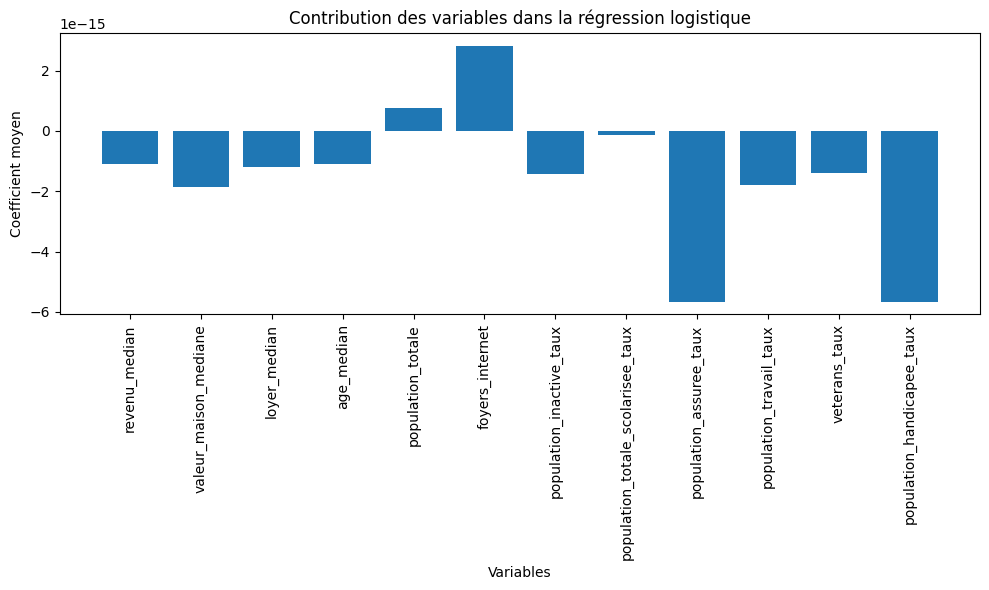

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Initialisation du modèle de régression logistique
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)

# Entraînement du modèle
log_reg.fit(X_train, y_train)

# Prédiction sur le jeu d’entraînement
y_pred_train = log_reg.predict(X_train)

# Prédiction sur le jeu de test
y_pred_test = log_reg.predict(X_test)

# Évaluation sur le jeu d’entraînement
print("Jeu d'entraînement")
print("Exactitude :", accuracy_score(y_train, y_pred_train))
print("Précision :", precision_score(y_train, y_pred_train, average='weighted'))
print("Rappel :", recall_score(y_train, y_pred_train, average='weighted'))
print("F1 Score :", f1_score(y_train, y_pred_train, average='weighted'))

# Évaluation sur le jeu de test
print("\nJeu de test")
print("Exactitude :", accuracy_score(y_test, y_pred_test))
print("Précision :", precision_score(y_test, y_pred_test, average='weighted'))
print("Rappel :", recall_score(y_test, y_pred_test, average='weighted'))
print("F1 Score :", f1_score(y_test, y_pred_test, average='weighted'))

# Visualisation de la contribution des variables pour vérifier qu'il n'y a pas de redondance ou de fuite (c'était le cas avant...)
coefficients = log_reg.coef_

# Pour un problème multi-classes, moyennons les coefficients sur les classes
mean_coefficients = np.mean(coefficients, axis=0)

# Création du graphique
plt.figure(figsize=(10, 6))
plt.bar(X_train.columns, mean_coefficients)
plt.xticks(rotation=90)
plt.xlabel("Variables")
plt.ylabel("Coefficient moyen")
plt.title("Contribution des variables dans la régression logistique")
plt.tight_layout()
plt.show()




## 2.3 Cross-validation pour le SVM avec différents noyaux

Nous allons effectuer une cross-validation pour évaluer un SVM avec plusieurs noyaux en optimisant le paramètre γ. Pour chaque noyau, nous traçons la courbe d'exactitude en fonction de γ.

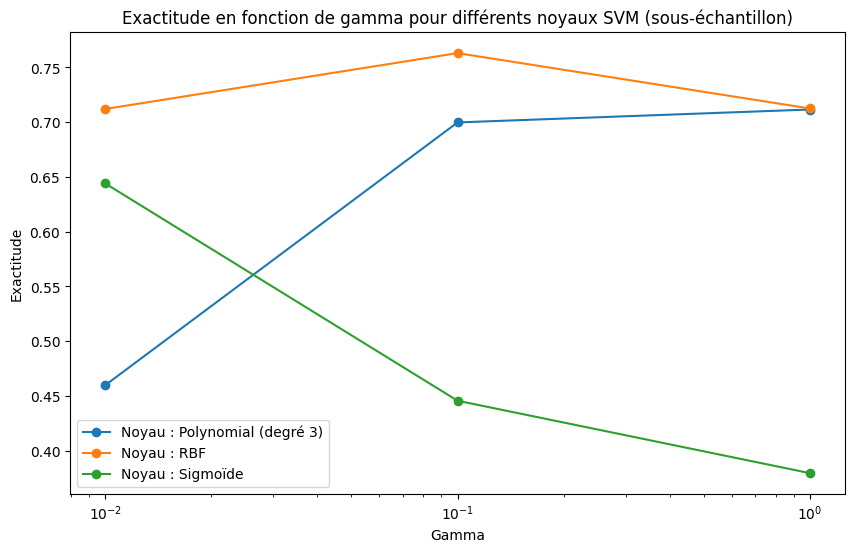

In [ ]:
# Restreindre la plage de gamma pour une recherche plus rapide
gammas = np.logspace(-2, 0, 3)

# Utiliser un sous-échantillon (50%) pour réduire le temps d’exécution mais garder des résultats satisfaisants
X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, train_size=0.5, random_state=42)

# Fonction pour évaluer chaque noyau avec des paramètres réduits pour accélérer la recherche
def evaluate_svm_kernel(kernel_name, kernel_function):
    #paramètres pour le SVM avec C fixé à 5
    param_grid = {'gamma': gammas}
    svm = SVC(C=5, kernel=kernel_function)

    # Effectuer une GridSearch avec cv=3 sur le sous-échantillon
    grid_search = GridSearchCV(svm, param_grid, cv=3, scoring='accuracy')
    grid_search.fit(X_train_sample, y_train_sample)

    # Récupérer les scores de validation pour chaque valeur de gamma
    scores = grid_search.cv_results_['mean_test_score']

    # Tracer la courbe d'exactitude en fonction de gamma
    plt.plot(gammas, scores, marker='o', label=f'Noyau : {kernel_name}')
    plt.xscale('log')
    plt.xlabel('Gamma')
    plt.ylabel('Exactitude')
    plt.title("Exactitude en fonction de gamma pour différents noyaux SVM (sous-échantillon)")
    plt.legend()

# Appliquer l’évaluation pour chaque noyau
plt.figure(figsize=(10, 6))
evaluate_svm_kernel("Polynomial (degré 3)", "poly")
evaluate_svm_kernel("RBF", "rbf")
evaluate_svm_kernel("Sigmoïde", "sigmoid")
plt.show()


## 2.4 Sélection du meilleur modèle et comparaison avec la baseline

RBF, selon la courbe

In [ ]:
# Définir le meilleur noyau et gamma basé sur la cross-validation (par exemple, si le RBF a le meilleur score avec gamma=0.1)
best_kernel = "rbf"
best_gamma = 0.1

# Initialiser le meilleur modèle SVM
best_svm = SVC(C=5, kernel=best_kernel, gamma=best_gamma, random_state=42)

# Entraîner le modèle sur le jeu d’entraînement complet
best_svm.fit(X_train, y_train)

# Prédiction sur le jeu d’entraînement
y_pred_train_svm = best_svm.predict(X_train)

# Prédiction sur le jeu de test
y_pred_test_svm = best_svm.predict(X_test)

# Évaluation des performances du SVM sur le jeu d’entraînement
print("Meilleur modèle SVM - Jeu d'entraînement")
print("Exactitude :", accuracy_score(y_train, y_pred_train_svm))
print("Précision :", precision_score(y_train, y_pred_train_svm, average='weighted'))
print("Rappel :", recall_score(y_train, y_pred_train_svm, average='weighted'))
print("F1 Score :", f1_score(y_train, y_pred_train_svm, average='weighted'))

# Évaluation des performances du SVM sur le jeu de test
print("\nMeilleur modèle SVM - Jeu de test")
print("Exactitude :", accuracy_score(y_test, y_pred_test_svm))
print("Précision :", precision_score(y_test, y_pred_test_svm, average='weighted'))
print("Rappel :", recall_score(y_test, y_pred_test_svm, average='weighted'))
print("F1 Score :", f1_score(y_test, y_pred_test_svm, average='weighted'))


Meilleur modèle SVM - Jeu d'entraînement
Exactitude : 0.8314447592067988
Précision : 0.831064666782724
Rappel : 0.8314447592067988
F1 Score : 0.8305150019558666

Meilleur modèle SVM - Jeu de test
Exactitude : 0.8064211520302171
Précision : 0.805431705882138
Rappel : 0.8064211520302171
F1 Score : 0.8055750071327336



Le modèle SVM est performant, il atteint une exactitude de **83%** sur le jeu d'entraînement et **81%** sur le jeu de test, ce qui montre une bonne généralisation. Les scores de précision, rappel et F1 sont également cohérents, ce qui indique un équilibre entre la détection des catégories et l'absence de surapprentissage.

## 3.1 Clustering hiérarchique agglomératif et score Calinski-Harabasz

Nombre optimal de clusters selon Calinski-Harabasz : 3


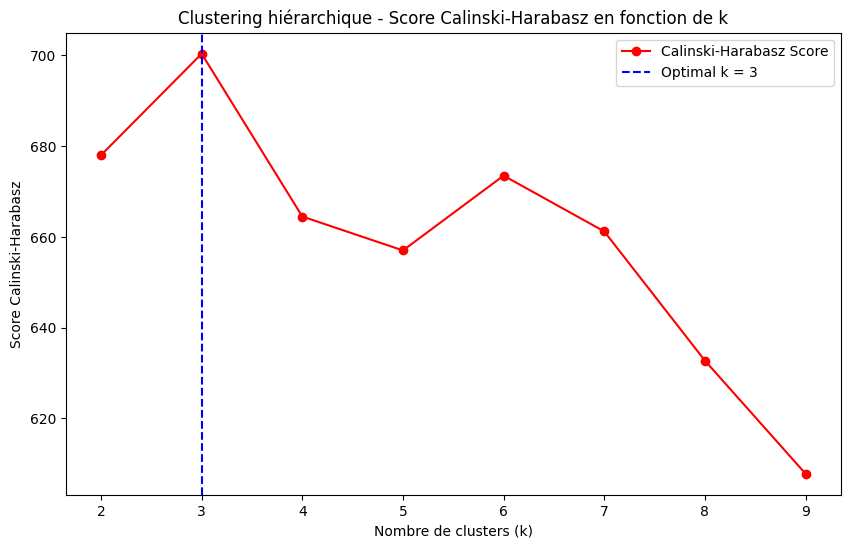

In [ ]:
# Liste pour stocker les scores Calinski-Harabasz pour chaque k
k_values = range(2, 10)
scores_agglo = []

# Appliquer le clustering hiérarchique pour chaque k et calculer le score Calinski-Harabasz
for k in k_values:
    agglomerative = AgglomerativeClustering(n_clusters=k)
    clusters = agglomerative.fit_predict(X_train)
    score = calinski_harabasz_score(X_train, clusters)
    scores_agglo.append(score)

# Détecter automatiquement le meilleur k (celui avec le score maximum)
optimal_k = k_values[scores_agglo.index(max(scores_agglo))]

# Afficher le résultat
print(f"Nombre optimal de clusters selon Calinski-Harabasz : {optimal_k}")

# Tracer la courbe du score Calinski-Harabasz
plt.figure(figsize=(10, 6))
plt.plot(k_values, scores_agglo, marker='o', label="Calinski-Harabasz Score", color = 'red')
plt.axvline(x=optimal_k, color='blue', linestyle='--', label=f'Optimal k = {optimal_k}')
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Score Calinski-Harabasz")
plt.title("Clustering hiérarchique - Score Calinski-Harabasz en fonction de k")
plt.legend()
plt.show()


Nous retenon ici 3 clusters (pic du score).

 ## 3.2 Clustering avec GMM et score Calinski-Harabasz

Nombre optimal de clusters selon Calinski-Harabasz : 2


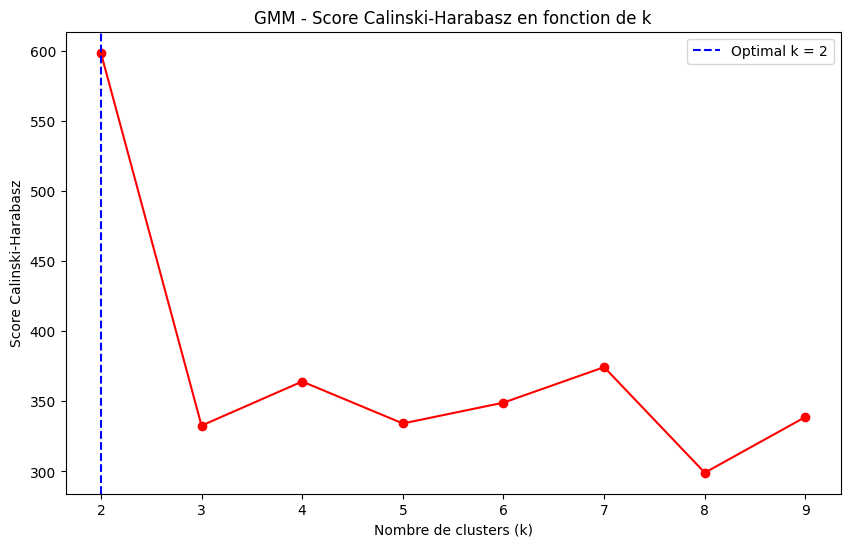

In [ ]:
# Liste pour stocker les scores Calinski-Harabasz pour chaque k
scores_gmm = []

# Appliquer le modèle GMM pour chaque k et calculer le score Calinski-Harabasz
for k in k_values:
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm_labels = gmm.fit_predict(X_train)
    score = calinski_harabasz_score(X_train, gmm_labels)
    scores_gmm.append(score)

# Détecter automatiquement le meilleur k (celui avec le score maximum)
optimal_k = k_values[scores_gmm.index(max(scores_gmm))]

# Afficher le résultat
print(f"Nombre optimal de clusters selon Calinski-Harabasz : {optimal_k}")

# Tracer la courbe du score Calinski-Harabasz
plt.figure(figsize=(10, 6))
plt.plot(k_values, scores_gmm, marker='o', color='red')
plt.axvline(x=optimal_k, color='blue', linestyle='--', label=f'Optimal k = {optimal_k}')
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Score Calinski-Harabasz")
plt.title("GMM - Score Calinski-Harabasz en fonction de k")
plt.legend()
plt.show()


Nous retenons ici 2 clusters, car le score y est a son maximum.

## 3.3 Calculer les métriques de clustering

In [ ]:
# Définir le nombre de clusters
best_k_agglo = 3
best_k_gmm = 2

# Clustering hiérarchique avec le meilleur k
agglomerative = AgglomerativeClustering(n_clusters=best_k_agglo)
clusters_agglo = agglomerative.fit_predict(X_train)

# GMM avec le meilleur k
gmm = GaussianMixture(n_components=best_k_gmm, random_state=42)
clusters_gmm = gmm.fit_predict(X_train)

# Calcul des scores pour le clustering agglomératif
ami_agglo = adjusted_mutual_info_score(y_train, clusters_agglo)
homogeneity_agglo = homogeneity_score(y_train, clusters_agglo)
completeness_agglo = completeness_score(y_train, clusters_agglo)

# Calcul des scores pour le modèle GMM
ami_gmm = adjusted_mutual_info_score(y_train, clusters_gmm)
homogeneity_gmm = homogeneity_score(y_train, clusters_gmm)
completeness_gmm = completeness_score(y_train, clusters_gmm)

# Affichage des scores
print("Clustering hiérarchique - AMI:", ami_agglo, "Homogénéité:", homogeneity_agglo, "Complétude:", completeness_agglo)
print("GMM - AMI:", ami_gmm, "Homogénéité:", homogeneity_gmm, "Complétude:", completeness_gmm)


Clustering hiérarchique - AMI: 0.09436441504647175 Homogénéité: 0.07232760706357488 Complétude: 0.1385857470077413
GMM - AMI: 0.03444688144193077 Homogénéité: 0.02593859611992718 Complétude: 0.05294599420047408


Les scores AMI, homogénéité, et complétude pour les deux méthodes de clustering sont faibles, indiquant que les clusters obtenus ne correspondent pas bien aux catégories réelles. GMM a un léger avantage, AMI (0.0905), mais sa faible homogénéité (0.0737) montre une difficulté à regrouper les données en clusters.

## 3.4 Choix de la meilleure méthode de clustering et comparaison

In [ ]:
# Calculer les scores AMI pour la baseline et le SVM
from sklearn.metrics import adjusted_mutual_info_score

# Prédictions avec les modèles de classification pour calculer l'AMI
y_pred_baseline = log_reg.predict(X_train)  # Régression logistique (baseline)
y_pred_svm = best_svm.predict(X_train)  # SVM avec le meilleur noyau et gamma

# Calcul des scores AMI pour la baseline et le SVM
ami_baseline = adjusted_mutual_info_score(y_train, y_pred_baseline)
ami_svm = adjusted_mutual_info_score(y_train, y_pred_svm)

# Affichage des résultats comparatifs
print("Comparaison des scores AMI :")
print("Clustering hiérarchique :", ami_agglo)
print("GMM :", ami_gmm)
print("Baseline (régression logistique) :", ami_baseline)
print("SVM :", ami_svm)


Comparaison des scores AMI :
Clustering hiérarchique : 0.09436441504647175
GMM : 0.03444688144193077
Baseline (régression logistique) : 0.3788087310402194
SVM : 0.579143327776222



Le SVM est la méthode la plus performante pour cette tâche, avec le score AMI le plus élevé. Il capture le mieux les relations entre les variables et les catégories de pauvreté.
Les méthodes de clustering ne sont pas bien adaptées à ce problème, car elles n'ont pas réussi à identifier des clusters correspondant aux classes réelles.

le SVM sera le meilleur choix pour les prochaines étapes de la Partie 4, car il montre une  meilleure performance que la baseline et les méthodes de clustering.

## Étape 4.1 : Réduction des dimensions avec t-SNE

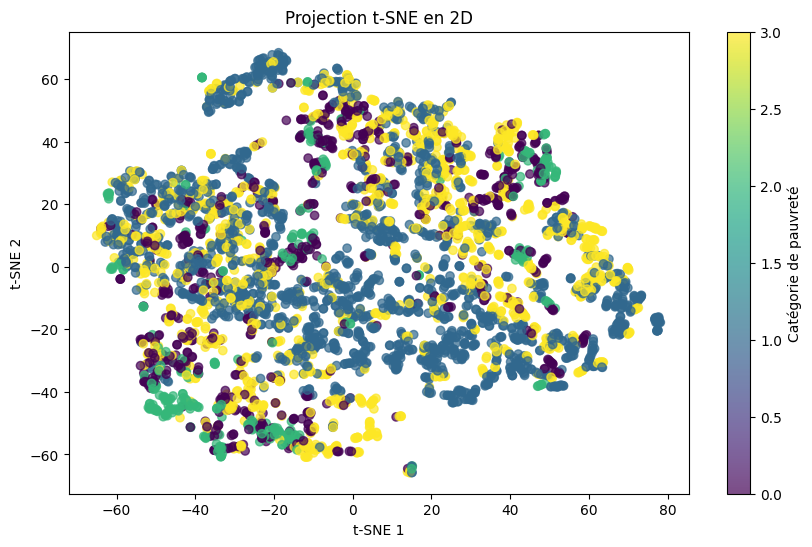

In [ ]:
# Appliquer t-SNE pour réduire les données à deux dimensions
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_train)

# Visualisation des données réduites avec t-SNE
plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train, cmap="viridis", alpha=0.7)
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.title("Projection t-SNE en 2D")
plt.colorbar(label="Catégorie de pauvreté")
plt.show()


## 4.2 : Sélection de la méthode de prédiction (SVM)

Puisque le SVM est la méthode la plus performante d’après les étapes précédentes, nous allons l'utiliser pour prédire la catégorie de pauvreté en utilisant les nouvelles données réduites en deux dimensions (X_tsne).

## 4.3 : Séparation du jeu de données et optimisation des hyperparamètres avec GridSearchCV

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC

# Diviser les données réduites en jeux d’entraînement et de test
X_train_tsne, X_test_tsne, y_train_tsne, y_test_tsne = train_test_split(X_tsne, y_train, test_size=0.2, random_state=42)

# Définir les paramètres pour la recherche de grille
param_grid = {
    'C': [1, 5, 10],
    'gamma': [0.1, 0.5, 1, 2],
    'kernel': ['rbf']
}

# Initialiser le modèle SVM
svm = SVC()

# Effectuer la gridsearch avec validation croisée
grid_search = GridSearchCV(svm, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train_tsne, y_train_tsne)

# Afficher les meilleurs paramètres
print("Meilleurs paramètres pour le SVM en 2D avec t-SNE :", grid_search.best_params_)

# Utiliser le meilleur modèle pour prédire sur le jeu de test
best_svm_tsne = grid_search.best_estimator_
test_accuracy = best_svm_tsne.score(X_test_tsne, y_test_tsne)

print(f"Exactitude sur le jeu de test avec les meilleurs paramètres : {test_accuracy:.2f}")


Meilleurs paramètres pour le SVM en 2D avec t-SNE : {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Exactitude sur le jeu de test avec les meilleurs paramètres : 0.73


## Étape 4.4 : Tracer les frontières de décision

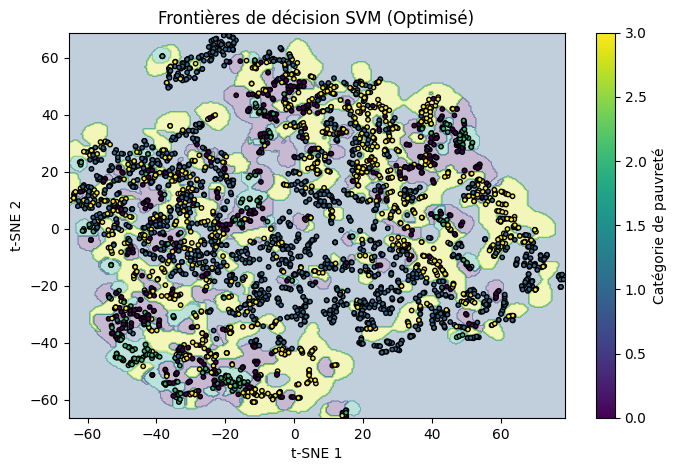

In [ ]:
# Modèle SVM optimisé avec les meilleurs paramètres
best_svm_tsne = grid_search.best_estimator_

# Réduire la résolution de la grille
x_min, x_max = X_train_tsne[:, 0].min() - 0.5, X_train_tsne[:, 0].max() + 0.5
y_min, y_max = X_train_tsne[:, 1].min() - 0.5, X_train_tsne[:, 1].max() + 0.5

# Réduire l'espacement pour une exécution plus rapide
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.5),  # Augmenter l'incrément pour réduire le nombre de points
    np.arange(y_min, y_max, 0.5)
)

# Prédictions des frontières de décision
Z = best_svm_tsne.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Tracé des résultats
plt.figure(figsize=(8, 5))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="viridis")
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train_tsne, cmap="viridis", edgecolor="k", s=10)
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.title("Frontières de décision SVM (Optimisé)")
plt.colorbar(label="Catégorie de pauvreté")
plt.show()


In [ ]:
# Prédictions sur le jeu de test réduit (t-SNE)
y_pred_test_tsne = best_svm_tsne.predict(X_test_tsne)

# Calcul de l'efficacité
accuracy = accuracy_score(y_test_tsne, y_pred_test_tsne)
correct_predictions = (y_pred_test_tsne == y_test_tsne).sum()  # Nombre de prédictions correctes
total_predictions = y_test_tsne.shape[0]  # Nombre total d'essais

# Affichage des résultats
print(f"Précision du modèle SVM optimisé en 2D (t-SNE) : {accuracy:.2f}")
print(f"Nombre de réussites : {correct_predictions} sur {total_predictions} essais")


Précision du modèle SVM optimisé en 2D (t-SNE) : 0.73
Nombre de réussites : 619 sur 848 essais


## Sauvegarder le meilleur modèle

In [ ]:
import joblib
# Sauvegarder le modèle SVM optimisé
joblib.dump(best_svm_tsne, "svm_tsne.pkl")

['svm_tsne.pkl']

## Discussion

Le SVM est ici la méthode la plus performante, surpassant le clustering et la baseline. Cependant, les scores AMI et l'efficacité du SVM en 2D (t-SNE) restent faibles, ce qui montre la difficulté qu'il existe à capturer la structure de ces données. Une amélioration possible serait d'inclure l'exploration d'autres modèles non linéaires (Random Forest, Gradient Boosting) et/ou une optimisation plus fine des variables conservées. La pauvreté étant souvent étroitement liées à différents facteurs quantifiables, il doit être possible de la prédire également grâce à des modèles linéaires plus simples, en utilisant des variables plus adaptées.

# Temps d'exécution

In [ ]:
# Calculer et afficher le temps total d'exécution
end_time = time.time()
execution_time = end_time - start_time

# Formater le temps en heures, minutes et secondes
hours, rem = divmod(execution_time, 3600)
minutes, seconds = divmod(rem, 60)
print(f"Temps total d'exécution du notebook : {int(hours)}h {int(minutes)}m {int(seconds)}s")


Temps total d'exécution du notebook : 0h 7m 56s
